In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
clusters <- read.table(
    "../../Abed-SI-Mapping/metadata_skin_samples_reformatted.csv", 
    row.names=1,
    header=TRUE, 
    sep=","
)
head(clusters)

,predicted.ID
,<int>
SPIRT5Pre-Skin336_AAACCTGCAAAGAATC-1,1
SPIRT5Pre-Skin336_AAACCTGCAAAGCGGT-1,4
SPIRT5Pre-Skin336_AAACCTGCACATAACC-1,1
SPIRT5Pre-Skin336_AAACCTGCATACTCTT-1,1
SPIRT5Pre-Skin336_AAACCTGGTAAGAGGA-1,1
SPIRT5Pre-Skin336_AAACCTGGTACAGTGG-1,5


In [3]:
print.cluster.overlap <- function(seurat.fn, label, clusters, cluster.id, min.cells = 1) {
    load(seurat.fn)
    seurat <- AddMetaData(object = seurat, metadata=clusters)
    print(DimPlot(seurat) + labs(title=label))
    print(DimPlot(seurat, cells.highlight = rownames(filter(clusters, predicted.ID == 2))) + labs(title=label))
    seurat <- seurat |> FindNeighbors(dims = 1:10, reduction="harmony") |> FindClusters(resolution = 0.5)
    print(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident))
    overlapping_clusters <- names(which(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters)["2",] >= min.cells))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident)[overlapping_clusters, ])    
    seurat
}

Computing nearest neighbor graph

Computing SNN



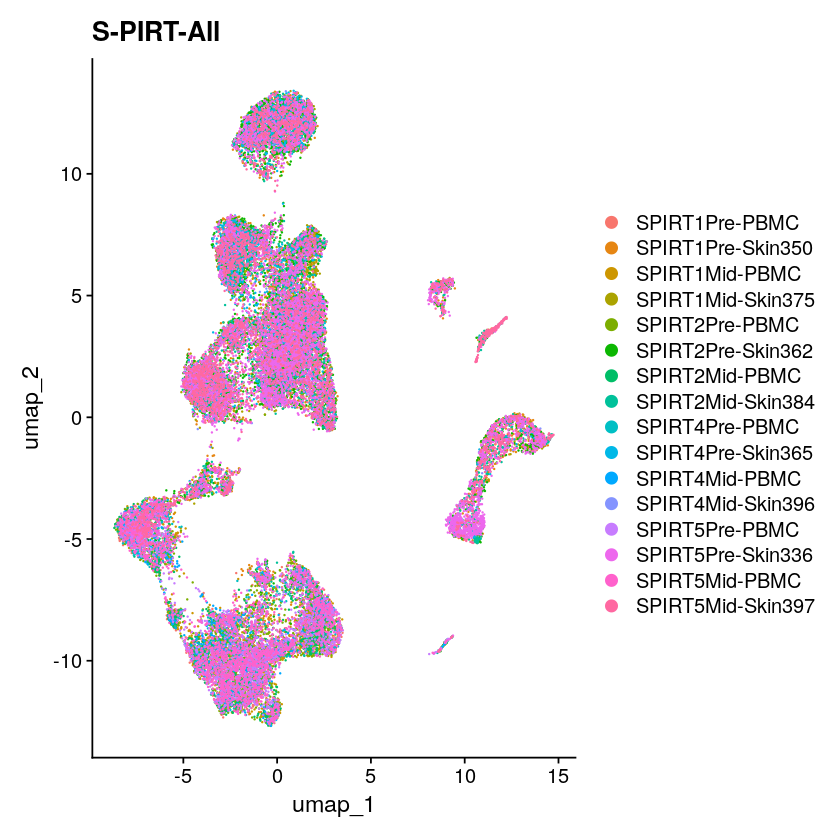

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36474
Number of edges: 1153697

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9196
Number of communities: 18
Elapsed time: 11 seconds
    
        0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  1  3207    0  110  331   55   31    6    8  432    0   89    0    5    0    0
  2    51    0   11  233   22 1938    1    0   10    0    4    0    2    1    0
  3    27    0 3317   16    7   40    0    0   24    0    0    0    0    0    3
  4  1595    0   77  775  103  224    0    0   17    0   12    0    4    0    1
  5    31    0    1  363 2471   51   74    0    3    0    8    0    5    0    0
  6   157    0    0  416   63   17    7    0    2    0    2    0    9    0    0
  7   473    0   37  146    5   49    0    0    9    0  363    0    4    0    0
  8    33    0    2   11    4    1    0    0    6    0   44    0    0    0    0
  9   266    0    3  346  

An object of class Seurat 
18082 features across 36474 samples within 1 assay 
Active assay: RNA (18082 features, 7551 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, umap, harmony

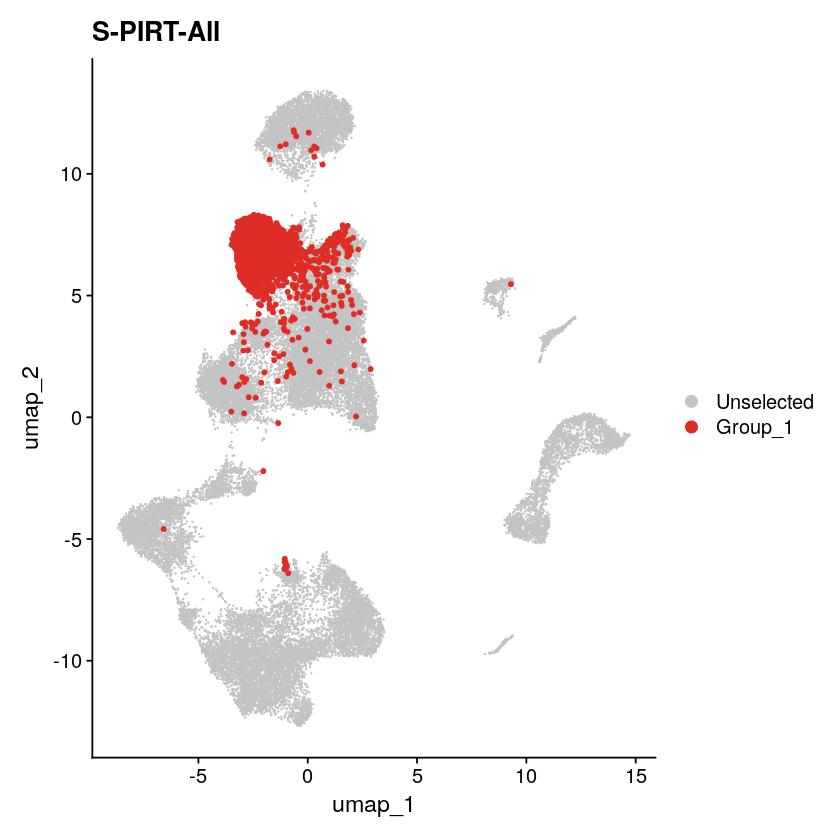

In [4]:
print.cluster.overlap("outs-harmonizeAll/S-PIRT-All.RData", "S-PIRT-All", clusters, "2")